In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns


#Predicting Mean earnings ten years out

In [89]:
x = '/Users/davidhoffman/Downloads/df (2).csv'

df = pd.read_csv(x)

In [90]:
df.rename(index=str, columns={"MD_EARN_WNE_P10": "target"}, inplace=True)

In [27]:
#cols to drop taken from Marco

"""#cols_to_drop = ['ACTCMMID', 'ACTEN25', 'ACTEN75', 'ACTENMID', 'ACTMT25', 'ACTMTMID', 'ACTWRMID',
                'COUNT_ED', 'COUNT_NWNE_P6', 'COUNT_NWNE_P7', 'COUNT_NWNE_P8', 'COUNT_NWNE_P9', 
                'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC1_P6', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC2_P6', 
                'COUNT_WNE_INC3_P10', 'COUNT_WNE_INC3_P6', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_INDEP1_P6',
                'COUNT_WNE_MALE0_P10', 'COUNT_WNE_MALE0_P6', 'COUNT_WNE_MALE1_P10', 'COUNT_WNE_MALE1_P6', 
                'COUNT_WNE_P10', 'COUNT_WNE_P6', 'COUNT_WNE_P7', 'COUNT_WNE_P8', 'COUNT_WNE_P9', 
                'GRAD_DEBT_MDN10YR_SUPP', 'GT_25K_P7', 'GT_25K_P8', 'GT_25K_P9', 'HIGHDEG', 
                'LN_MEDIAN_HH_INC', 'MD_EARN_WNE_P6', 'MD_EARN_WNE_P8', 'MN_EARN_WNE_INC1_P10', 
                'MN_EARN_WNE_INC1_P6', 'MN_EARN_WNE_INC3_P10', 'MN_EARN_WNE_INC3_P6', 
                'MN_EARN_WNE_INDEP0_P10', 'MN_EARN_WNE_INDEP0_P6', 'MN_EARN_WNE_INDEP1_P10', 
                'MN_EARN_WNE_INDEP1_P6', 'MN_EARN_WNE_MALE0_P10', 'MN_EARN_WNE_MALE0_P6', 
                'MN_EARN_WNE_MALE1_P10', 'MN_EARN_WNE_MALE1_P6', 'MN_EARN_WNE_P7', 'MN_EARN_WNE_P8',
                'MN_EARN_WNE_P9', 'PCT10_EARN_WNE_P8', 'PCT25_EARN_WNE_P10', 'PCT25_EARN_WNE_P6', 
                'PCT25_EARN_WNE_P8', 'PCT75_EARN_WNE_P10', 'PCT75_EARN_WNE_P6', 'PCT75_EARN_WNE_P8',
                'PCT90_EARN_WNE_P10', 'PCT90_EARN_WNE_P6', 'PCT90_EARN_WNE_P8', 'SATMTMID', 
                'SATVRMID', 'SATWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 
                'SD_EARN_WNE_P10', 'MD_EARN_WNE_P10']

#df = df.drop(cols_to_drop,axis=1)"""

"#cols_to_drop = ['ACTCMMID', 'ACTEN25', 'ACTEN75', 'ACTENMID', 'ACTMT25', 'ACTMTMID', 'ACTWRMID',\n                'COUNT_ED', 'COUNT_NWNE_P6', 'COUNT_NWNE_P7', 'COUNT_NWNE_P8', 'COUNT_NWNE_P9', \n                'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC1_P6', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC2_P6', \n                'COUNT_WNE_INC3_P10', 'COUNT_WNE_INC3_P6', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_INDEP1_P6',\n                'COUNT_WNE_MALE0_P10', 'COUNT_WNE_MALE0_P6', 'COUNT_WNE_MALE1_P10', 'COUNT_WNE_MALE1_P6', \n                'COUNT_WNE_P10', 'COUNT_WNE_P6', 'COUNT_WNE_P7', 'COUNT_WNE_P8', 'COUNT_WNE_P9', \n                'GRAD_DEBT_MDN10YR_SUPP', 'GT_25K_P7', 'GT_25K_P8', 'GT_25K_P9', 'HIGHDEG', \n                'LN_MEDIAN_HH_INC', 'MD_EARN_WNE_P6', 'MD_EARN_WNE_P8', 'MN_EARN_WNE_INC1_P10', \n                'MN_EARN_WNE_INC1_P6', 'MN_EARN_WNE_INC3_P10', 'MN_EARN_WNE_INC3_P6', \n                'MN_EARN_WNE_INDEP0_P10', 'MN_EARN_WNE_INDEP0_P6', 'MN_EARN_WNE_INDEP1_P10', \n         

In [28]:
#Marcos functions

def get_modelname(model):
    name = str(model).partition('(')[0]
    return(name)

def evaluate_models(models, X, y):
    from sklearn.preprocessing import StandardScaler 
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline

    scoring = 'r2'  #'neg_mean_squared_error'
    modelnames = []
    results = []
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=8, random_state=6, shuffle=True)
        cv_results = cross_val_score(pipe, X, y, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print ("%s: %.3f %.3f" %(modelname, cv_results.mean(), cv_results.std()))
        modelnames.append(modelname)
        results.append(cv_results)
    
    return(results)

In [29]:
#Marco continued
#cols = ['INSTNM', 'CITY','STABBR']
#df = df.drop(cols,axis=1)

In [91]:
#predict based off metrics if youre school will produce earners in top 75 percentile

tar = df.target.quantile(.75)

df['high_earners_10'] = (df.target >= tar)*1

In [120]:
#Create lin reg
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X=df.drop(['INSTNM','CITY','STABBR','target','high_earners_10'],axis=1)
y=df.high_earners_10

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=12345)


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)    

print (knn.score(X_test, y_test)) 
print (np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

0.9505002632964719
0.9415399610136452


In [46]:
def evaluate_model(model):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   cm = confusion_matrix(y_test, y_pred)
   print ('confusion matrix', confusion_matrix(y_test, y_pred))
   print ('accuracy', accuracy_score(y_test, y_pred))
   print ('sensitivity', recall_score(y_test, y_pred))
   print ('specificity', cm[1,1]/(cm[1,0]+cm[1,1]))

In [47]:
evaluate_model(knn)

confusion matrix [[1374   26]
 [  68  431]]
accuracy 0.9505002632964719
sensitivity 0.8637274549098196
specificity 0.8637274549098196


In [48]:
knn_params = {
    'n_neighbors':[500,3,50,90,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=2, scoring='accuracy')    
    
knn_gridsearch.fit(X_train, y_train)    
    
#Property	Use
knn_gridsearch.param_grid #Displays parameters searched over.
knn_gridsearch.best_score_ #Best mean cross-validated score achieved.
knn_gridsearch.best_estimator_ #Reference to model with best score. Is usable / callable.
print (knn_gridsearch.best_params_) #The parameters that have been found to perform with the best score.
#knn_gridsearch.grid_scores_ #Display score attributes with corresponding parameters.   


print ('best score', knn_gridsearch.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.6min


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
best score 0.9662802950474183


[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  9.1min finished


In [49]:
#manually input gridsearch results from cell above

knn_gs = KNeighborsClassifier(n_neighbors=15, weights="distance", metric="manhattan")
knn_gs = knn.fit(X_train, y_train)

In [50]:
y_preds = knn_gs.predict(X_test)
print(classification_report(y_test, y_preds))
pd.DataFrame(confusion_matrix(y_test, y_preds), columns=['Pred -', 'Pred +'], index=['Act -', 'Act +'])

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1400
          1       0.94      0.86      0.90       499

avg / total       0.95      0.95      0.95      1899



,Pred -,Pred +
Act -,1374,26
Act +,68,431


In [51]:
#AUC,ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

proba_pairs = knn_gs.predict_proba(X_test)
probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, probas)

0.9777898654451761

In [67]:
for _ in range(1,55):
    if _ < 10:
        print ('PCIP0',_)
    else:
        print ('PCIP',_)


PCIP0 1
PCIP0 2
PCIP0 3
PCIP0 4
PCIP0 5
PCIP0 6
PCIP0 7
PCIP0 8
PCIP0 9
PCIP 10
PCIP 11
PCIP 12
PCIP 13
PCIP 14
PCIP 15
PCIP 16
PCIP 17
PCIP 18
PCIP 19
PCIP 20
PCIP 21
PCIP 22
PCIP 23
PCIP 24
PCIP 25
PCIP 26
PCIP 27
PCIP 28
PCIP 29
PCIP 30
PCIP 31
PCIP 32
PCIP 33
PCIP 34
PCIP 35
PCIP 36
PCIP 37
PCIP 38
PCIP 39
PCIP 40
PCIP 41
PCIP 42
PCIP 43
PCIP 44
PCIP 45
PCIP 46
PCIP 47
PCIP 48
PCIP 49
PCIP 50
PCIP 51
PCIP 52
PCIP 53
PCIP 54


In [86]:
degs_cols = ['PCIP01',
'PCIP03',
'PCIP04',
'PCIP05',
'PCIP09',
'PCIP10',
'PCIP11',
'PCIP12',
'PCIP13',
'PCIP14',
'PCIP15',
'PCIP16',
'PCIP19',
'PCIP22',
'PCIP23',
'PCIP24',
'PCIP25',
'PCIP26',
'PCIP27',
'PCIP29',
'PCIP30',
'PCIP31',
'PCIP38',
'PCIP39',
'PCIP40',
'PCIP41',
'PCIP42',
'PCIP43',
'PCIP44',
'PCIP45',
'PCIP46',
'PCIP47',
'PCIP48',
'PCIP49',
'PCIP50',
'PCIP51',
'PCIP52',
'PCIP54']



In [125]:
#KNN model only looking at the breakdown of degrees awarded by school

X=df[degs_cols]
y=df.high_earners_10

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=12345)

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)    

In [126]:
knn_params = {
    'n_neighbors':[500,3,50,90,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=2, scoring='accuracy')    
    
knn_gridsearch.fit(X_train, y_train)    
    
#Property	Use
knn_gridsearch.param_grid #Displays parameters searched over.
knn_gridsearch.best_score_ #Best mean cross-validated score achieved.
knn_gridsearch.best_estimator_ #Reference to model with best score. Is usable / callable.
print (knn_gridsearch.best_params_) #The parameters that have been found to perform with the best score.
#knn_gridsearch.grid_scores_ #Display score attributes with corresponding parameters.   


print ('best score', knn_gridsearch.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.4s


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
best score 0.8600280997541272


[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:   43.7s finished


In [95]:
print (knn.score(X_test, y_test))

0.8525539757767245


In [98]:
np.mean(cross_val_score(knn, X_test, y_test, cv=10))

0.8278306878306878

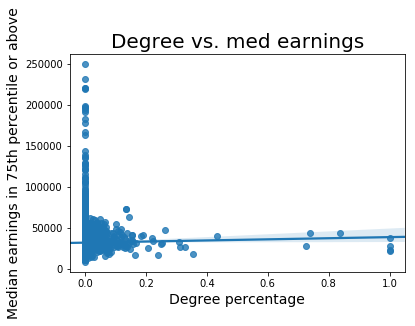

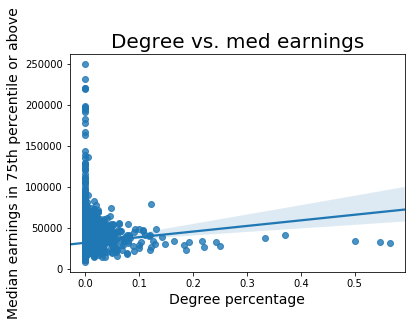

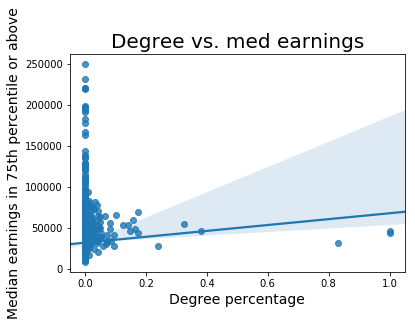

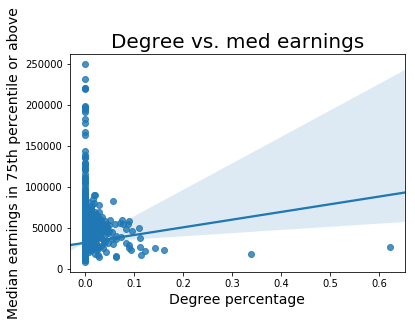

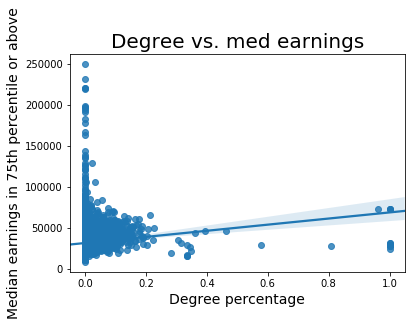

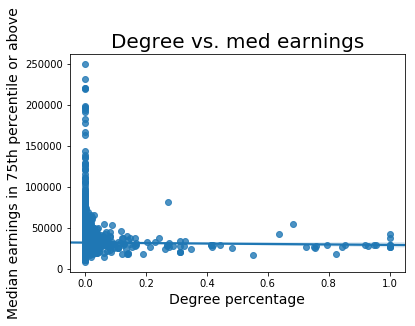

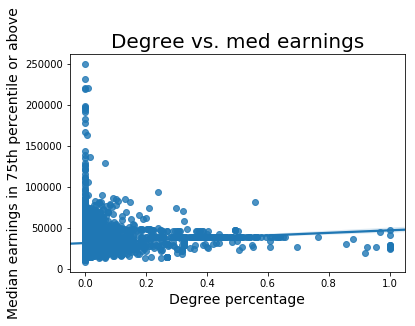

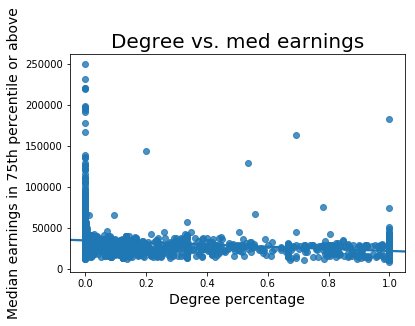

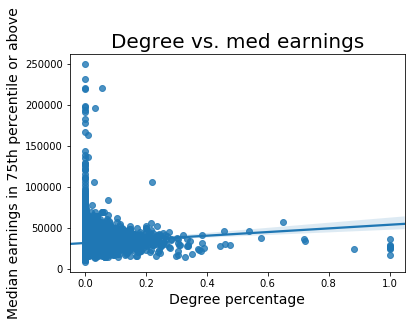

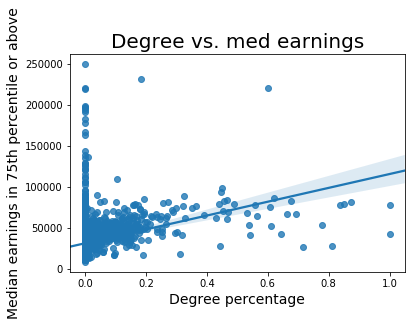

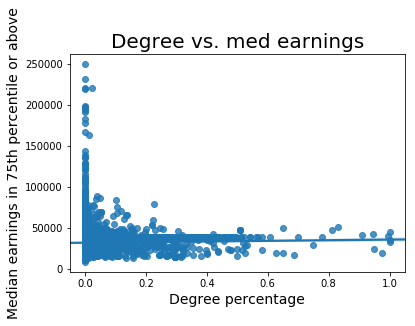

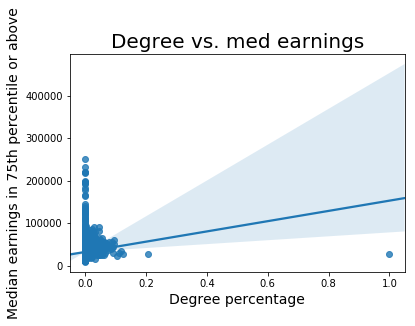

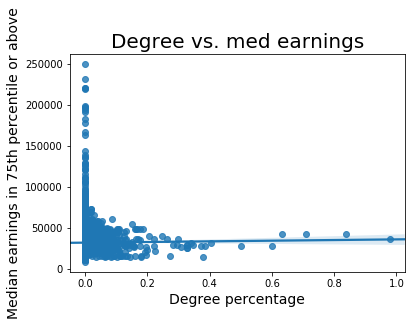

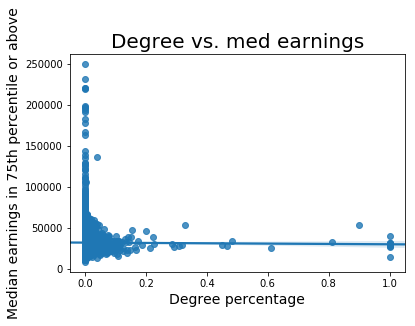

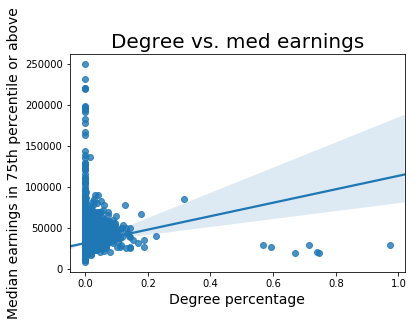

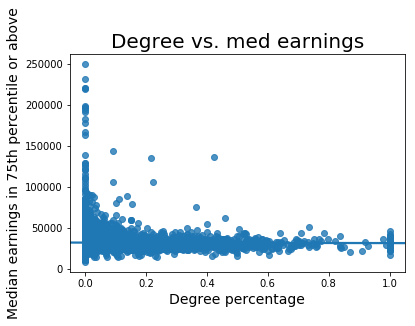

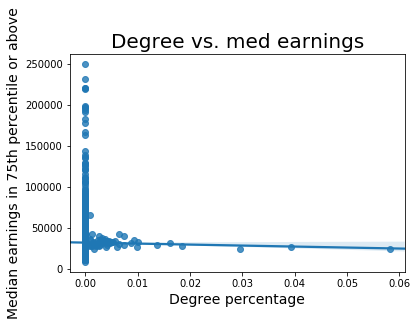

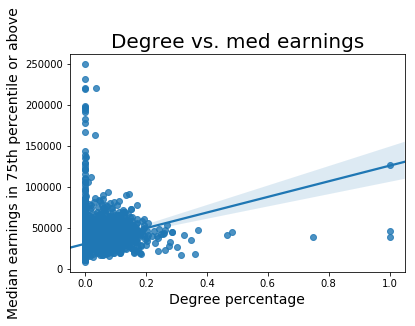

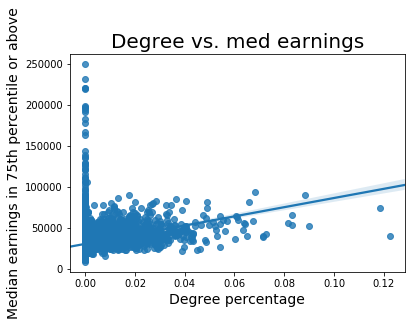

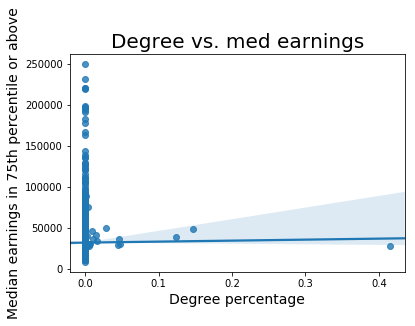

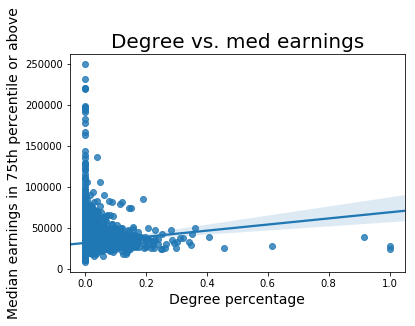

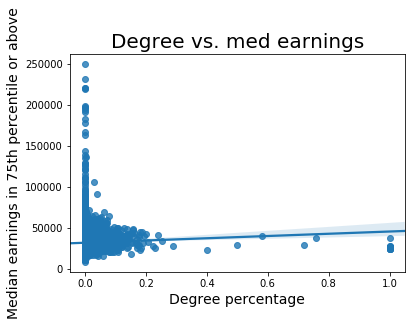

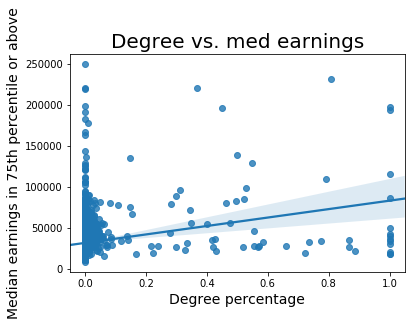

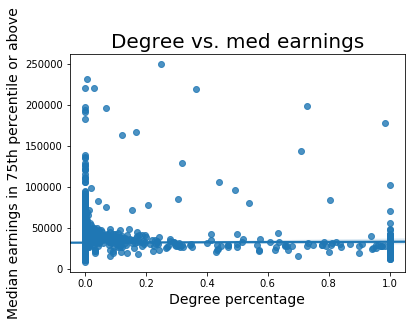

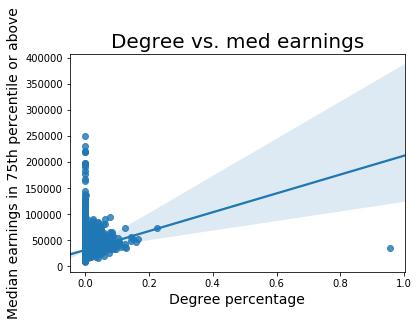

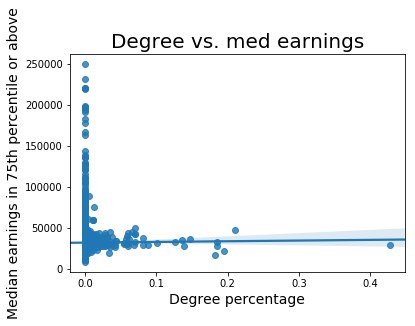

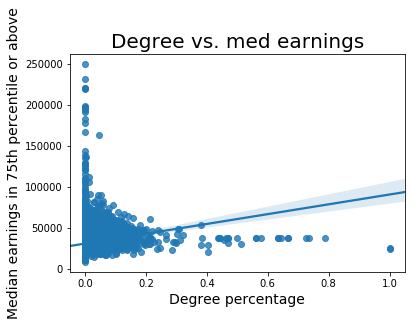

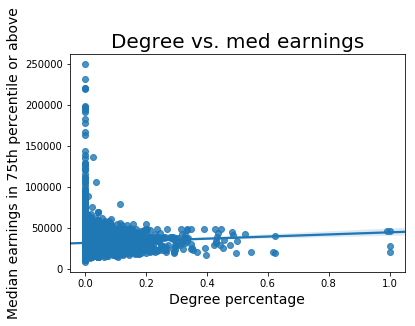

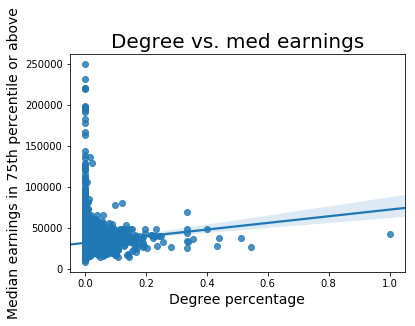

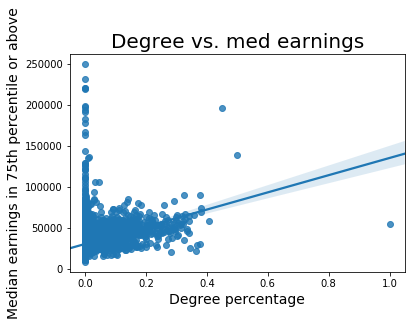

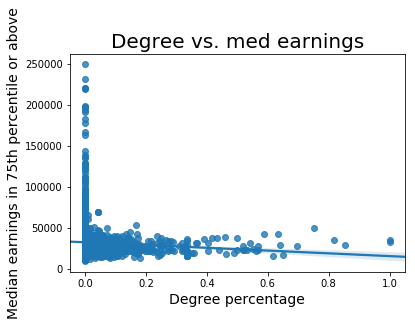

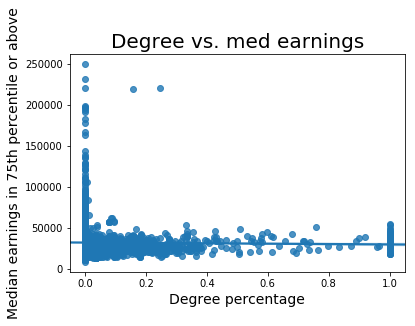

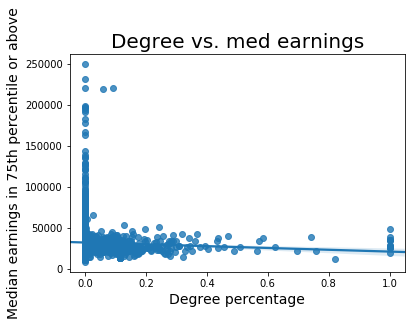

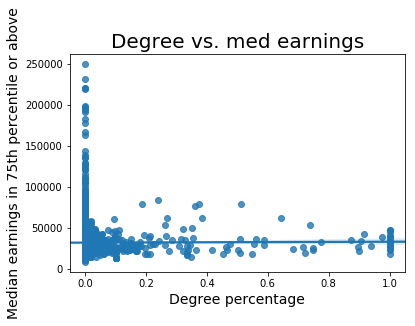

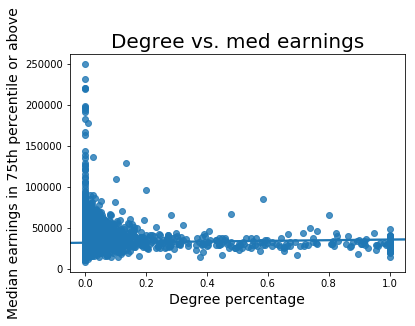

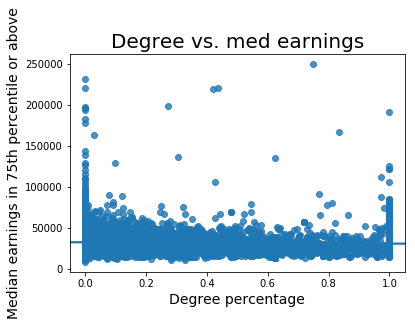

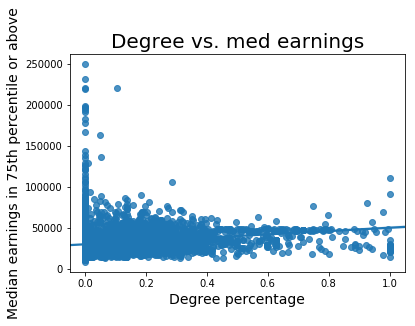

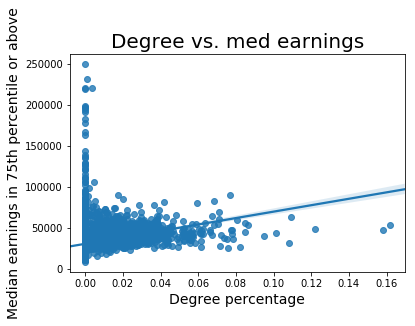

In [115]:
for i in degs_cols:
        sns.regplot(df[i], df['target'])
        plt.xlabel('Degree percentage', fontsize=14)
        plt.ylabel('Median earnings in 75th percentile or above', fontsize=14)
        plt.title('Degree vs. med earnings', fontsize=20);
        plt.show()
    